<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [237]:
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep = ';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [238]:
print(hh_data.head())
print(hh_data.tail())
print(hh_data.columns)
print(hh_data.shape)

                                   Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...  

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [239]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [240]:
print(hh_data['Опыт работы'].nunique())
print(hh_data['Последняя/нынешняя должность'].mode())

44413
0    Системный администратор
Name: Последняя/нынешняя должность, dtype: object


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [241]:
def refact_edu(line):
    if (line.find('образование') != -1):
        pos = line.find('образование')
        return line[:pos-1]
    return np.NaN

hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(refact_edu)
hh_data = hh_data.drop('Образование и ВУЗ', axis = 1)
print(hh_data['Образование'].nunique())
print(hh_data.shape)

4
(44744, 12)


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [242]:
def refact_gender(line):
    general_info = line.split(' , ')
    if (general_info[0] == 'Мужчина'):
        gender = 'М'
    elif (general_info[0] == 'Женщина'):
        gender = 'Ж'
    age = int(general_info[1][:3])
    return gender

def refact_age(line):
    general_info = line.split(' , ')
    age = int(general_info[1][:3])
    return age

hh_data['Пол'] = hh_data['Пол, возраст'].apply(refact_gender)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(refact_age)
print(hh_data['Пол'].value_counts(normalize=True) * 100)
print(hh_data['Возраст'].mean())
hh_data = hh_data.drop('Пол, возраст', axis = 1)

Пол
М    80.929287
Ж    19.070713
Name: proportion, dtype: float64
32.19473001966744


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [243]:
def refact_experience(line):
    if line == np.NaN:
        return np.NaN
    if isinstance(line, float):
        return np.NaN
    exp = line.split(' ')
    result = 0
    right = min(len(exp), 6)
    for i, value in enumerate(exp[:right - 1]):
        if value.isdigit() and (exp[i + 1].startswith('го') or exp[i + 1].startswith('ле')):
            result += int(value) * 12
        elif value.isdigit() and exp[i + 1].startswith('ме'):
            result += int(value)
    return int(result)

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(refact_experience)
print(hh_data['Опыт работы (месяц)'].median())
hh_data = hh_data.drop('Опыт работы', axis = 1)

100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [244]:
def refact_city_move(line):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    city, mov_possible, business_trip, m_index = '', False, False, 0
    inf = line.split(' , ')
    if inf[0] == 'Москва':
        city = 'Москва'
    elif inf[0] == 'Санкт-Петербург':
        city = 'Санкт-Петербург'
    elif inf[0] in million_cities:
        city = 'город-миллионник'
    else:
        city = 'другие'
        
    if line.find('м.') == -1: m_index = 1
    else: m_index = 2
    if inf[m_index].find('не') != -1: mov_possible = False
    else: mov_possible = True

    if (inf[-1].find('не') != -1) and (inf[-1].find('команд') != -1): business_trip = False
    elif (inf[-1].find('не') == -1) and (inf[-1].find('команд') != -1): business_trip = True
    elif inf[-1].find('команд') == -1: business_trip = False

    return str(city) + ' ' + str(mov_possible) + ' ' + str(business_trip)

temp = hh_data['Город, переезд, командировки'].apply(refact_city_move)
hh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = temp.str.split(' ', expand = True)
hh_data['Готовность к переезду'] = hh_data['Готовность к переезду'].apply(lambda x: 0 if x == 'False' else 1)
hh_data['Готовность к командировкам'] = hh_data['Готовность к командировкам'].apply(lambda x : 0 if x == 'False' else 1)
hh_data['Готовность к переезду'] = hh_data['Готовность к переезду'].astype(bool)
hh_data['Готовность к командировкам'] = hh_data['Готовность к командировкам'].astype(bool)
hh_data = hh_data.drop('Город, переезд, командировки', axis = 1)
print(hh_data['Город'].value_counts(normalize=True) * 100)
mask = (hh_data['Готовность к переезду'] == 'True') & (hh_data['Готовность к командировкам'] == 'True')
print(hh_data[mask].shape[0] / hh_data.shape[0] * 100)
print(hh_data['Готовность к переезду'].value_counts())
hh_data.info()

Город
Москва              37.146880
другие              35.432684
город-миллионник    16.386555
Санкт-Петербург     11.033882
Name: proportion, dtype: float64
0.0
Готовность к переезду
False    28857
True     15887
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Занятость                        44744 non-null  object 
 3   График                           44744 non-null  object 
 4   Последнее/нынешнее место работы  44743 non-null  object 
 5   Последняя/нынешняя должность     44742 non-null  object 
 6   Обновление резюме                44744 non-null  object 
 7   Авто                             44744 non-null  object 
 8   Образование              

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [245]:
def refact_employment(line):
    inf = line.replace(', ', ',').split(',')
    emp = [False, False, False, False, False]
    if 'полная занятость' in inf: emp[0] = True
    if 'частичная занятость' in inf: emp[1] = True
    if 'проектная работа' in inf: emp[2] = True
    if 'стажировка' in inf: emp[3] = True
    if 'волонтерство' in inf: emp[4] = True
    return emp

def refact_timetable(line):
    inf = line.replace(', ', ',').split(',')
    emp = [False, False, False, False, False]
    if 'полный день' in inf: emp[0] = True
    if 'сменный график' in inf: emp[1] = True
    if 'гибкий график' in inf: emp[2] = True
    if 'удаленная работа' in inf: emp[3] = True
    if 'вахтовый метод' in inf: emp[4] = True
    return emp

temp = hh_data['Занятость'].apply(refact_employment)
temp = list(temp)
temp = pd.DataFrame(temp, columns = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка', 'волонтерство'])
hh_data = hh_data.join(temp)
mask = (hh_data['проектная работа'] == True) & (hh_data['волонтерство'] == True)
print(hh_data[mask].shape[0])

temp = hh_data['График'].apply(refact_timetable)
temp = list(temp)
temp = pd.DataFrame(temp, columns = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод'])
hh_data = hh_data.join(temp)
mask = (hh_data['гибкий график'] == True) & (hh_data['вахтовый метод'] == True)
print(hh_data[mask].shape[0])

hh_data = hh_data.drop(['Занятость', 'График'], axis = 1)
print(hh_data.columns)

436
2311
Index(['ЗП', 'Ищет работу на должность:', 'Последнее/нынешнее место работы',
       'Последняя/нынешняя должность', 'Обновление резюме', 'Авто',
       'Образование', 'Пол', 'Возраст', 'Опыт работы (месяц)', 'Город',
       'Готовность к переезду', 'Готовность к командировкам',
       'полная занятость', 'частичная занятость', 'проектная работа',
       'стажировка', 'волонтерство', 'полный день', 'сменный график',
       'гибкий график', 'удаленная работа', 'вахтовый метод'],
      dtype='object')


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [246]:
def refact_salary(line):
    currency = {
        'грн.': ('UAH', 10),
        'USD': ('USD', 1),
        'EUR': ('EUR', 1),
        'бел.руб.': ('BYN', 1),
        'KGS': ('KGS', 10),
        'сум': ('UZS', 10000),
        'AZN': ('AZN', 1),
        'KZT': ('KZT', 100)
    }
    inf = line.split(' ')
    if inf[1] not in currency:
        return inf[0], inf[1], 1
    return inf[0], currency[inf[1]][0], currency[inf[1]][1]

rates_data = pd.read_csv('data/ExchangeRates.csv', sep = ',')

hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'])
rates_data['date'] = pd.to_datetime(rates_data['date'])

temp = hh_data['ЗП'].apply(refact_salary)
temp = list(temp)
temp = pd.DataFrame(temp, columns = ['salary', 'currency', 'rate'])
temp = temp.join(hh_data['Обновление резюме'].dt.date)
temp['Обновление резюме'] = pd.to_datetime(temp['Обновление резюме'])

temp = temp.merge(rates_data, how = 'left', left_on = ['currency', 'Обновление резюме'], right_on = ['currency', 'date'])
temp = temp.drop('date', axis = 1)
temp = temp.fillna(1)
temp['salary'] = temp['salary'].astype(float)
temp['close'] = temp['close'].astype(float)
temp['proportion'] = temp['proportion'].astype(float)

temp['ЗП (руб)'] = temp['salary'] * temp['close'] / temp['proportion']
print(temp['ЗП (руб)'].median())
hh_data['ЗП (руб)'] = temp['ЗП (руб)']
hh_data = hh_data.drop('ЗП', axis = 1)
hh_data.info()

C:\Users\Иван\AppData\Local\Temp\ipykernel_14088\157199813.py:19: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\Иван\AppData\Local\Temp\ipykernel_14088\157199813.py:20: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



59000.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  object        
 6   Пол                              44744 non-null  object        
 7   Возраст                          44744 non-null  int64         
 8   Опыт работы (месяц)              44576 non-null  float64       
 9   Город                            44744 non-null  object        
 10  Готовность к переезду            44744 non-null  b

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

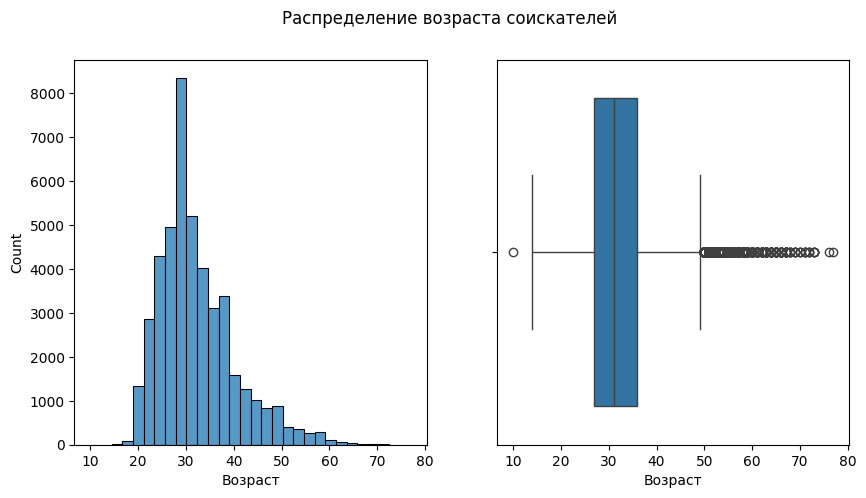

In [247]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.histplot(data = hh_data, x = 'Возраст', ax = axes[0], bins = 30)
sns.boxplot(data = hh_data, x = 'Возраст', ax = axes[1], orient = 'h')
fig.suptitle('Распределение возраста соискателей')
plt.show()

Модальное значение возраста соискателей равно 30-ти годам. Максимальный возраст 74 года, а минимальный 15. Возраст большинства находится в интервале от 22 до 38. К аномалиям, возможно, можно отнести людей в возрасте от 65 до 74 лет, так как пенсионный возраст у мужчин начинается с 65 лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

1188.0


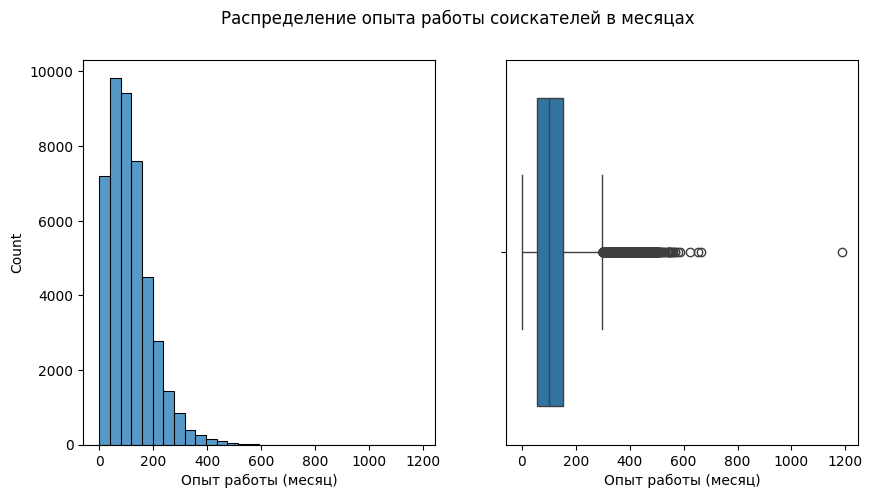

In [248]:
fig_1, axes_1 = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.histplot(data = hh_data, x = 'Опыт работы (месяц)', ax = axes_1[0], bins = 30)
sns.boxplot(data = hh_data, x = 'Опыт работы (месяц)', ax = axes_1[1], orient = 'h')
fig_1.suptitle('Распределение опыта работы соискателей в месяцах')
print(hh_data['Опыт работы (месяц)'].max())
plt.show()

Модальное значение опыта работы равно 70 месяцев, примерно 5.8 лет. Это хороший показатель, так как обычно такого возраста достаточно, чтобы найти неплохо оплачиваемую работу. Предельное значение 1188 месяцев, что и является единственной аномалией, следующее значение 650 месяцев (54.1 года) что вполне реально. Опыт работы большинства находится в интервале между 0 и 200.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


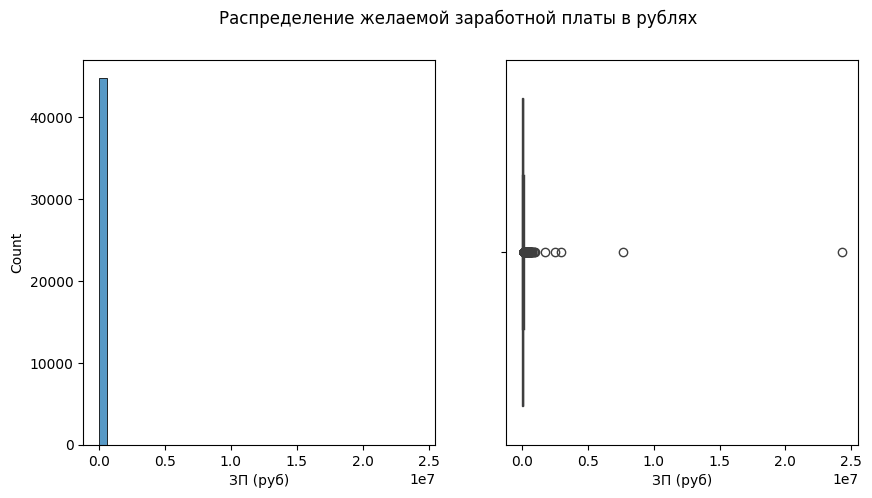

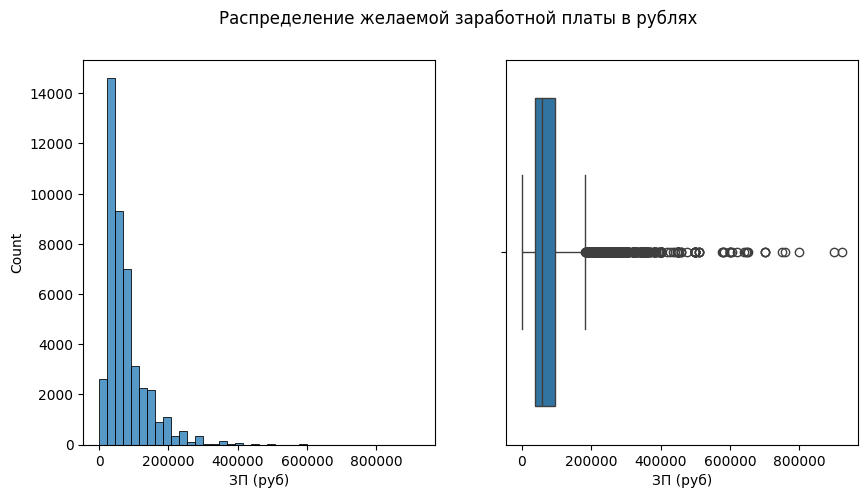

0    50000.0
Name: ЗП (руб), dtype: float64
923983.0
59000.0


In [249]:
fig_2, axes_2 = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.histplot(data = hh_data, x = 'ЗП (руб)', bins = 40, ax = axes_2[0])
sns.boxplot(data = hh_data, x = 'ЗП (руб)', orient = 'h', ax = axes_2[1])
fig_2.suptitle('Распределение желаемой заработной платы в рублях')
# plt.show()

mask = hh_data['ЗП (руб)'] < 1000000
hh_data_norm = hh_data[mask].copy()

fig_3, axes_3 = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.histplot(data = hh_data_norm, x = 'ЗП (руб)', bins = 40, ax = axes_3[0])
sns.boxplot(data = hh_data_norm, x = 'ЗП (руб)', orient = 'h', ax = axes_3[1])
fig_3.suptitle('Распределение желаемой заработной платы в рублях')
plt.show()
print(hh_data_norm['ЗП (руб)'].mode())
print(hh_data_norm['ЗП (руб)'].max())
print(hh_data_norm['ЗП (руб)'].median())

Самая распространенная желаемая заработная плата лежит в районе 50 тысяч. Это значит, что на рынке труда довольно много людей без образования и людей, которые имеют очень маленький опыт работы. Есть аномалия - это ЗП в размере 25 миллионов рублей. Максимальное значение без аномалии 920 тысяч рублей. Большинство значений находятся в интервале от 0 до 100 тысяч. Довольно большое кол-во выбросов при ЗП выше 200 тысяч рублей.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [250]:
pivot = pd.pivot_table(
    hh_data_norm,
    values = 'ЗП (руб)',
    columns = 'Образование',
    aggfunc = 'median'
)
pivot = pivot.T
fig = px.bar(pivot, orientation='v')
fig.update_layout(
    title = 'Зависимость медиальной ЗП от образования',
    xaxis_title='Уровень образования',
    yaxis_title='Медиальная желаемая ЗП',
)
fig.show()
fig.write_html("graphs/salary_edu.html")

На графике видна явная зависимость желаемой ЗП от уровня образования. Медиальное значение возрастает с повышением уровня образования. Следовательно более образованные люди требуют более высокую ЗП. Скачки видны при переходе от среднего специального к неоконченному высшему и к высшему. Из этого можно сделать вывод, что этот признак будет полезен при прогнозировании желаемой ЗП.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [251]:
fig = px.box(
    data_frame = hh_data_norm,
    x = 'ЗП (руб)',
    y = 'Город',
)
fig.update_layout(
    title = 'Распределение ЗП в зависимости от города',
)
fig.show()
fig.write_html("graphs/salary_city.html")

Из этих графиков видна явная зависимость требуемой ЗП в зависимости от города. В Москве самое высокое медиальное значение 85к, в то время как в Санкт-Петербурге 60к, а в городах с начелением ниже одного миллиона всего 30к. Так и значения первого и третьего квантилей в Москве на порядок выше, чем в других городах. Однозначно признак города будет иметь большой вес при прогнозировании желаемой ЗП.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [252]:
pivot_1 = pd.pivot_table(
    hh_data,
    values = 'ЗП (руб)',
    columns = ['Готовность к переезду'],
    index = 'Готовность к командировкам',
    aggfunc = 'median'
)
print(pivot_1)
fig = px.bar(
    data_frame = pivot_1,
    barmode = 'group'
)
fig.show()
fig.write_html("graphs/salary_move_travel.html")

Готовность к переезду         False    True 
Готовность к командировкам                  
False                       40000.0  50000.0
True                        60000.0  65001.0


Исходя из того графика, можно сделать вывод, что с появлением возможности перезда и возможности отправиться в командировку, люди требуют за это более высокую заработную плату.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [253]:
pivot_2 = pd.pivot_table(
    hh_data_norm,
    values = 'ЗП (руб)',
    columns = 'Образование',
    index = 'Возраст',
    aggfunc = 'median'
)
fig = px.imshow(pivot_2, color_continuous_scale='RdBu_r')
fig.show()
fig.write_html("graphs/salary_edu_age.html")

Самые низкие показатели зп в группах среднее и среднее специальное. Наиболее выявленный рост зп в зависимости от возраста у людей с высшим образованием, несколько меньше с неоконченным высшим и самый малозаметный рост у людей со средним и средним специальным.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [254]:
from plotly.subplots import make_subplots  
import plotly.graph_objects as go

hh_data_copy = hh_data.copy()
hh_data_copy['Опыт работы (год)'] = hh_data['Опыт работы (месяц)'].apply(lambda x: x // 12)

fig = go.Figure()
trace1 = go.Scatter(x = hh_data_copy['Возраст'], y = hh_data_copy['Опыт работы (год)'], mode='markers', name='зависимость опыта работы от возраста')
trace2 = go.Scatter(x = [i for i in range(0, 100)], y = [i for i in range(0, 100)])
fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(
    title = 'Зависимость опыта работы от возраста',
    xaxis_title='Возраст',
    yaxis_title='Опыт работы',
)

fig.show()
fig.write_html("graphs/exp_age.html")

Видно, что в наших данных присутсвуют аномалии, но из диаграммы рассеяния не видно никаких явных зависимостей опыта работы от возраста.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [255]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [256]:
duplicates = hh_data[hh_data.duplicated(subset=hh_data.columns)]
hh_data = hh_data.drop_duplicates()
print(duplicates.shape[0])

158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [257]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44586 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44586 non-null  object        
 1   Последнее/нынешнее место работы  44585 non-null  object        
 2   Последняя/нынешняя должность     44584 non-null  object        
 3   Обновление резюме                44586 non-null  datetime64[ns]
 4   Авто                             44586 non-null  object        
 5   Образование                      44586 non-null  object        
 6   Пол                              44586 non-null  object        
 7   Возраст                          44586 non-null  int64         
 8   Опыт работы (месяц)              44420 non-null  float64       
 9   Город                            44586 non-null  object        
 10  Готовность к переезду            44586 non-null  bool          

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [258]:
print(hh_data['Опыт работы (месяц)'].mean())
val = hh_data['Опыт работы (месяц)'].median()
hh_data = hh_data.fillna(axis = 1, value = val)
print(hh_data['Опыт работы (месяц)'].mean())
hh_data.info()

114.40272399819901
114.34910061454268
<class 'pandas.core.frame.DataFrame'>
Index: 44586 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Ищет работу на должность:        44586 non-null  object
 1   Последнее/нынешнее место работы  44586 non-null  object
 2   Последняя/нынешняя должность     44586 non-null  object
 3   Обновление резюме                44586 non-null  object
 4   Авто                             44586 non-null  object
 5   Образование                      44586 non-null  object
 6   Пол                              44586 non-null  object
 7   Возраст                          44586 non-null  object
 8   Опыт работы (месяц)              44586 non-null  object
 9   Город                            44586 non-null  object
 10  Готовность к переезду            44586 non-null  object
 11  Готовность к командировкам       44586 non-null  object
 12 

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [259]:
print(hh_data.shape[0])
mask = (hh_data['ЗП (руб)'] > 1000000) | (hh_data['ЗП (руб)'] < 1000)
mask = hh_data[mask].index
hh_data = hh_data.drop(axis = 0, labels = mask)
print(hh_data.shape[0])

44586
44497


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [260]:
print(hh_data.shape[0])
mask = hh_data['Опыт работы (месяц)'] > (hh_data['Возраст'] * 12)
mask = hh_data[mask].index
hh_data = hh_data.drop(axis = 0, labels = mask)
print(hh_data.shape[0])

44497
44490


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

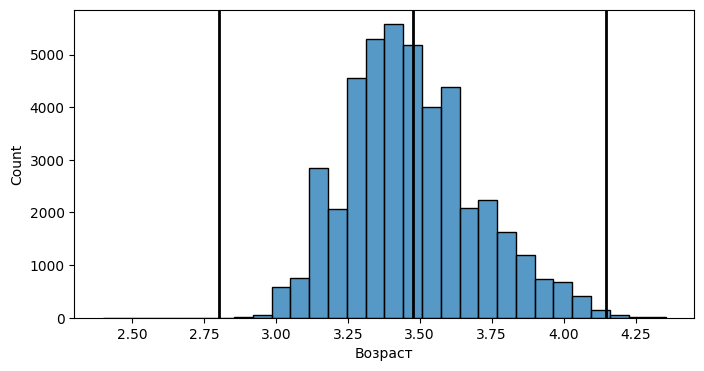

Кол-во выбросов: 3
Рез. кол-во строк: 44487
31137    15
32950    15
33654    10
Name: Возраст, dtype: int32


In [261]:
hh_data['Возраст'] = hh_data['Возраст'].astype(int)
age_log = np.log(hh_data['Возраст'] + 1)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 4))
histplot = sns.histplot(data = age_log, bins = 30, ax = ax)
histplot.axvline(age_log.mean(), color = 'k', lw = 2)
histplot.axvline(age_log.mean() - 3 * age_log.std(), color = 'k', lw = 2)
histplot.axvline(age_log.mean() + 3 * age_log.std(), color = 'k', lw = 2)
plt.show()
def outliers_z_score(data, feature, log_scale = False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature] + 1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_data, 'Возраст', log_scale = True, left = 3, right = 4)
print(f'Кол-во выбросов: {outliers.shape[0]}')
print(f'Рез. кол-во строк: {cleaned.shape[0]}')
print(outliers['Возраст'])

Логарифмическое распределение ассимитрично в правую сторону. В выбросах оказались люди в возрасте 10 и 15 лет.